In [3]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Problem 1: The Command Line

SSH into your instance. 

You will find a file located at $HOME/not-your-folder/2018_padro_nacionalitat_per_sexe.csv 

Your job is to create a new folder at $HOME/this-is-the-one, and move the csv file into that new folder

# Problem 2: Plotting in R

In [4]:
%%R

library(tidyverse)

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Conflicts with tidy packages ---------------------------------------------------

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: filter(): dplyr, stats
lag():    dplyr, stats

  warnings.warn(x, RRuntimeWarning)


In [5]:
%%R

# Read the file '2018_padro_nacionalitat_per_sexe.csv' from the new location, using read_csv
# put the resulting Tibble into a variable called 'barris'

barris <- read_csv("2018_padro_nacionalitat_per_sexe.csv")

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Parsed with column specification:
cols(
  Any = col_integer(),
  Codi_Districte = col_integer(),
  Nom_Districte = col_character(),
  Codi_Barri = col_integer(),
  Nom_Barri = col_character(),
  Sexe = col_character(),
  Nacionalitat = col_character(),
  Nombre = col_integer()
)

  warnings.warn(x, RRuntimeWarning)


In [7]:
%%R

# Let's manually convert a few columns into factors. 
barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri, NULL), 
                  Sexe = parse_factor(Sexe, NULL),
                  Nacionalitat = parse_factor(Nacionalitat, NULL))

# We want to explore the neighborhood referred to as 'el Poblenou', in the variable
# 'Nom_Barri' (neighborhood name). We will take a look at the gender and nationality
# of the non-Spanish population in this neighborhood. 
#
# First, filter the data to only 'el Poblenou'
# Second, remove the nationality 'Espanya'
# Third, plot a horizontal bar chart of the population counted by 'Nacionalitat',
# but only plot the most populous nationalities. Set a cutoff that looks right to you. 
#
# Note: the number of each 'Sexe'/'Nacionalitat' combo is in the variable 'Nombre'
# 
# Hint: group and count manually, and then use ggplot's geom_col and use coord_flip()
# to make the chart horizontal
#
# Bonus: Display the gender ('Sexe') in different colors, via the "fill" property!

# A tibble: 7,446 x 8
     Any Codi_Districte Nom_Districte Codi_Barri Nom_Barri   Sexe  Nacionalitat
   <int>          <int> <chr>              <int> <fct>       <fct> <fct>       
 1  2018              1 Ciutat Vella           1 el Raval    Home  Espanya     
 2  2018              1 Ciutat Vella           2 el Barri G… Home  Espanya     
 3  2018              1 Ciutat Vella           3 la Barcelo… Home  Espanya     
 4  2018              1 Ciutat Vella           4 Sant Pere,… Home  Espanya     
 5  2018              2 Eixample               5 el Fort Pi… Home  Espanya     
 6  2018              2 Eixample               6 la Sagrada… Home  Espanya     
 7  2018              2 Eixample               7 la Dreta d… Home  Espanya     
 8  2018              2 Eixample               8 l'Antiga E… Home  Espanya     
 9  2018              2 Eixample               9 la Nova Es… Home  Espanya     
10  2018              2 Eixample              10 Sant Antoni Home  Espanya     
# ... with 7,436 m

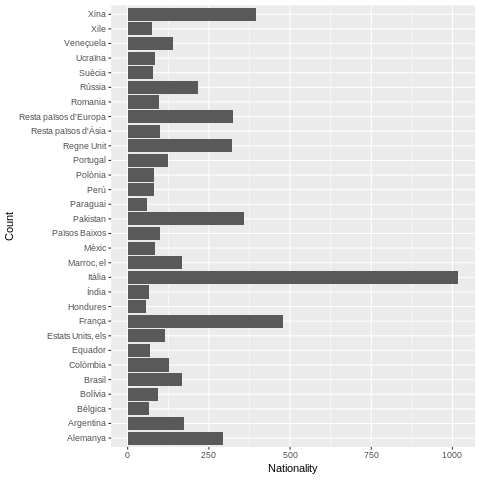

In [9]:
%%R

# Filter the data only to 'el Poblenou', 'Espanya', summarize male and female. Cutting off at the 0.4 quantile
poblenou <- barris %>% filter(Nom_Barri == "el Poblenou" ,Nacionalitat != "Espanya") %>%
                        group_by(Nacionalitat) %>%
                        summarize(count = sum(Nombre))

poblenou <- poblenou %>% filter(count >= quantile(poblenou$count, probs =0.4))


ggplot(poblenou, aes(x= Nacionalitat, y = count)) + geom_col() + coord_flip() + xlab("Count") + ylab("Nationality")

# Problem 3: Classes in Python

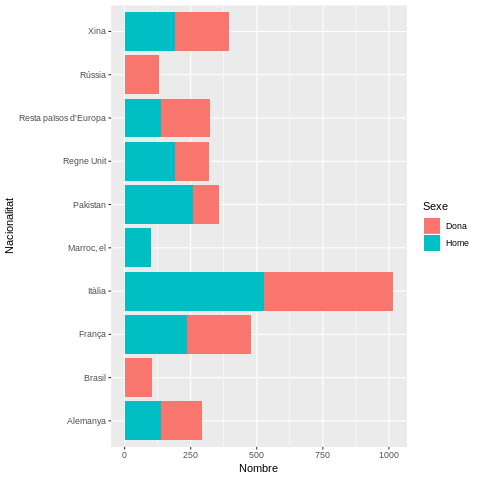

In [10]:
%%R

# Split by gender
poblenou_by_gender <- barris %>% filter(Nom_Barri == "el Poblenou" ,Nacionalitat != "Espanya", Nombre > 100) %>%
                        group_by(Nacionalitat)

ggplot(poblenou_by_gender, aes(x = Nacionalitat, y = Nombre, fill = Sexe)) + geom_col() + coord_flip()


In [ ]:
# Create a class called "RandomClassifier". 

# It's constructor should have one required parameter: 'probability'

# It should have one instance method, 'predict'

# The predict method should take one required parameter: 'x'

# The predict method should then randomly return a 1 or 0. It should return a 1
# with the probability given in the parameter

# The following cell has a test that should pass if you've done it correctly!

import numpy as np

class RandomClassifier:
    
    def __init__(self,probability):
        self.probability = probability
    
    def predict(self):
        value = np.random.uniform(0.0,1.0,1)
        if value > self.probability:
            return(0)
        else:
            return(1)

In [ ]:
import numpy as np

r = RandomClassifier(probability = .2)
m = np.mean([r.predict(x = i) for i in np.arange(100000)])

np.testing.assert_approx_equal(m, 0.2, 2)

# Problem 4: Some Theory

### What are pure functions and what are their strengths? (2-3 lines)

### What is lazy evaluation and when might you use it? (2-3 lines)